In [29]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
# Loading the dataset from GitHub
github_url = "https://github.com/FnuMufzaalAhmedQuadri/aim5005/raw/main/credit-card-dataset-for-clustering-main/P1G6_Set_1_dendi.csv"
df = pd.read_csv(github_url)

# Displaying basic information about the dataset
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           4475 non-null   int64  
 1   BALANCE                           4475 non-null   float64
 2   BALANCE_FREQUENCY                 4475 non-null   float64
 3   PURCHASES                         4475 non-null   float64
 4   ONEOFF_PURCHASES                  4475 non-null   float64
 5   INSTALLMENTS_PURCHASES            4475 non-null   float64
 6   CASH_ADVANCE                      4475 non-null   float64
 7   PURCHASES_FREQUENCY               4475 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        4475 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  4475 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            4475 non-null   float64
 11  CASH_ADVANCE_TRX                  4475 non-null   int64  
 12  PURCHA

In [33]:
# Handling the missing values
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(), inplace=True)


C:\Users\HP\AppData\Local\Temp\ipykernel_11136\771383987.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(), inplace=True)


In [35]:
# Feature selection
selected_features = [
    'BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 
    'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT'
]
df_selected = df[selected_features]

# Feature engineering
df['TOTAL_SPENDING'] = df['PURCHASES'] + df['CASH_ADVANCE']  # Add to original df
df['CREDIT_UTILIZATION'] = df['BALANCE'] / df['CREDIT_LIMIT']  # Add to original df

# Standardizing the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)

In [37]:
# Gaussian Mixture Model (GMM)
gmm_silhouette_scores = []
gmm_db_scores = []
n_components_range = [3, 4, 5]
covariance_types = ['full', 'tied', 'diag']

best_gmm_score = -1
best_gmm_params = {}

for n_components in n_components_range:
    for covariance_type in covariance_types:
        gmm = GaussianMixture(n_components=n_components, covariance_type=covariance_type, max_iter=200, random_state=42)
        gmm_labels = gmm.fit_predict(df_scaled)
        
        # Evaluating GMM
        silhouette_avg = silhouette_score(df_scaled, gmm_labels)
        db_score = davies_bouldin_score(df_scaled, gmm_labels)
        
        gmm_silhouette_scores.append(silhouette_avg)
        gmm_db_scores.append(db_score)
        
        # Tracking the best model
        if silhouette_avg > best_gmm_score:
            best_gmm_score = silhouette_avg
            best_gmm_params = {
                'n_components': n_components,
                'covariance_type': covariance_type,
                'silhouette_score': silhouette_avg,
                'davies_bouldin_score': db_score
            }

# Printing best GMM results
print("Best GMM Parameters:", best_gmm_params)

Best GMM Parameters: {'n_components': 3, 'covariance_type': 'tied', 'silhouette_score': 0.4676307933702645, 'davies_bouldin_score': 1.076199640961213}


In [39]:
# K-Means Clustering
kmeans_silhouette_scores = []
kmeans_db_scores = []
n_clusters_range = [3, 4, 5]
init_methods = ['k-means++', 'random']

best_kmeans_score = -1
best_kmeans_params = {}

for n_clusters in n_clusters_range:
    for init in init_methods:
        kmeans = KMeans(n_clusters=n_clusters, init=init, max_iter=200, random_state=42)
        kmeans_labels = kmeans.fit_predict(df_scaled)
        
        # Evaluating K-Means
        silhouette_avg = silhouette_score(df_scaled, kmeans_labels)
        db_score = davies_bouldin_score(df_scaled, kmeans_labels)
        
        kmeans_silhouette_scores.append(silhouette_avg)
        kmeans_db_scores.append(db_score)
        
        # Tracking the best model
        if silhouette_avg > best_kmeans_score:
            best_kmeans_score = silhouette_avg
            best_kmeans_params = {
                'n_clusters': n_clusters,
                'init': init,
                'silhouette_score': silhouette_avg,
                'davies_bouldin_score': db_score
            }

# Printing best K-Means results
print("Best K-Means Parameters:", best_kmeans_params)

Best K-Means Parameters: {'n_clusters': 3, 'init': 'k-means++', 'silhouette_score': 0.44816564104956585, 'davies_bouldin_score': 1.322081766650472}


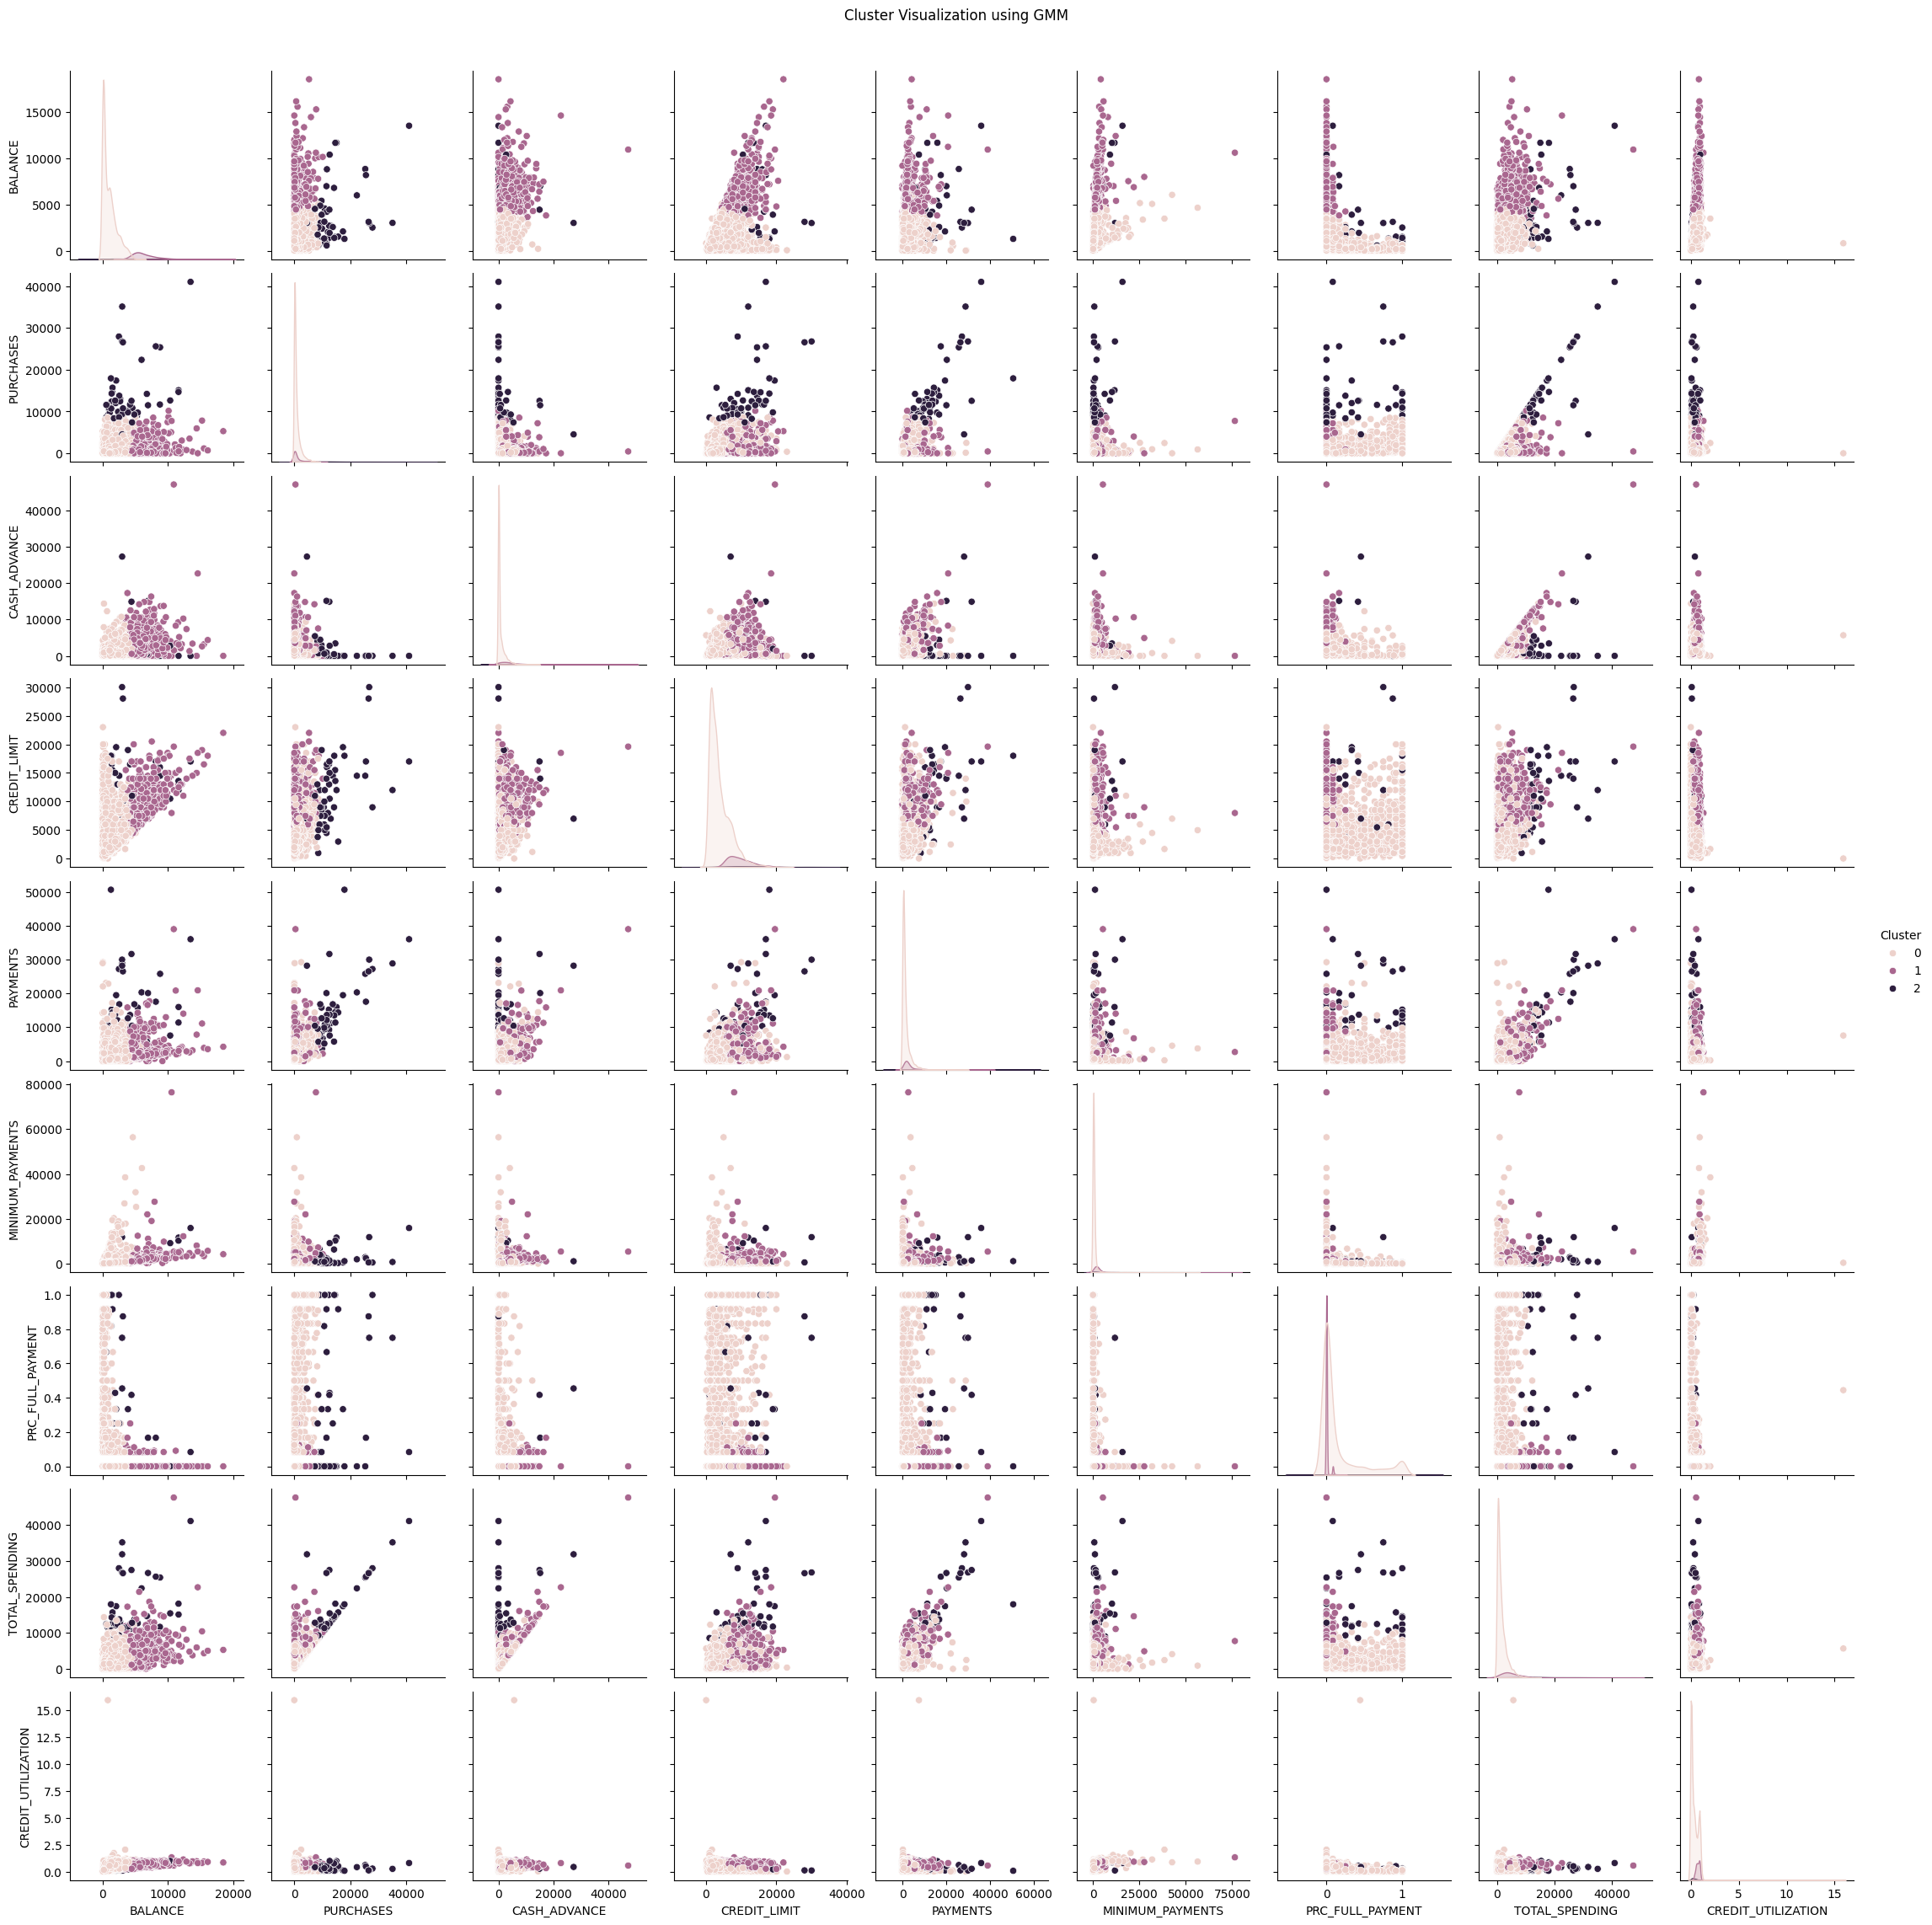

In [41]:
# Visualizing clustering results (for the best GMM model)
best_gmm = GaussianMixture(
    n_components=best_gmm_params['n_components'],
    covariance_type=best_gmm_params['covariance_type'],
    max_iter=200,
    random_state=42
)
gmm_labels = best_gmm.fit_predict(df_scaled)

# Adding cluster labels to the original dataframe
df['Cluster'] = gmm_labels

# Visualizing clusters using pairplot
sns.pairplot(df, hue='Cluster', vars=selected_features + ['TOTAL_SPENDING', 'CREDIT_UTILIZATION'])
plt.suptitle("Cluster Visualization using GMM", y=1.02)
plt.show()